<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
display(data.head(20))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data.columns = data.columns.str.lower()

есть пропуски в данных о том сколько лет человек является клиентом банка, возможно это новые клиенты банка

## Исследование задачи

In [7]:
#посмотрим описательную статистику
display(data['tenure'].describe())

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

In [8]:
#заполним пропуски в tenure медианной
data['tenure'] = data['tenure'].fillna(data['tenure'].median())
#удалим колонки customerid и surname
data.drop(columns=['customerid','surname'], axis=1, inplace=True)

In [9]:
#повторно посмотрим описательную статистик
display(data['tenure'].describe())

count    10000.00000
mean         4.99790
std          2.76001
min          0.00000
25%          3.00000
50%          5.00000
75%          7.00000
max         10.00000
Name: tenure, dtype: float64

In [10]:
#применим one hot encoding к датафрейму
data_ohe=pd.get_dummies(data, drop_first=True)
data_ohe.head()

,rownumber,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,1,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,2,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,3,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,4,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,5,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [11]:
#вынесем random_state в константу 
RANDOM_STATE = 12345
#разобьем данные на выборки
data_train, data_other = train_test_split(data_ohe, test_size=0.4, random_state=RANDOM_STATE, stratify=data_ohe['exited'])
data_valid, data_test = train_test_split(data_other, test_size=0.5, random_state=RANDOM_STATE, stratify=data_other['exited'])
#посмотрим на размер выборок
display(data_train.shape)
display(data_valid.shape)
display(data_test.shape)

(6000, 13)

(2000, 13)

(2000, 13)

In [12]:
#разделим датафрейм на признаки и целевой признак
target = data_ohe['exited']
features = data_ohe.drop(['exited', 'rownumber'], axis=1)
#разделим обучающий датафрейм на признаки и целевой признак
target_train = data_train['exited']
features_train = data_train.drop(['exited', 'rownumber'], axis=1)
#разделим валидационный датафрейм на признаки и целевой признак
target_valid = data_valid['exited']
features_valid = data_valid.drop(['exited', 'rownumber'], axis=1)
#разделим тестовый датафрейм на признаки и целевой признак
target_test = data_test['exited']
features_test = data_test.drop(['exited', 'rownumber'], axis=1)

In [13]:
#создадим список с числовыми столбцами
numeric = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']

In [14]:
#нормируем числовые данные используя StandardScaler
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


In [15]:
# Посмотрим количество объектов отрицательного и положительно класса
features[target == 0].shape, features[target == 1].shape

((7963, 11), (2037, 11))

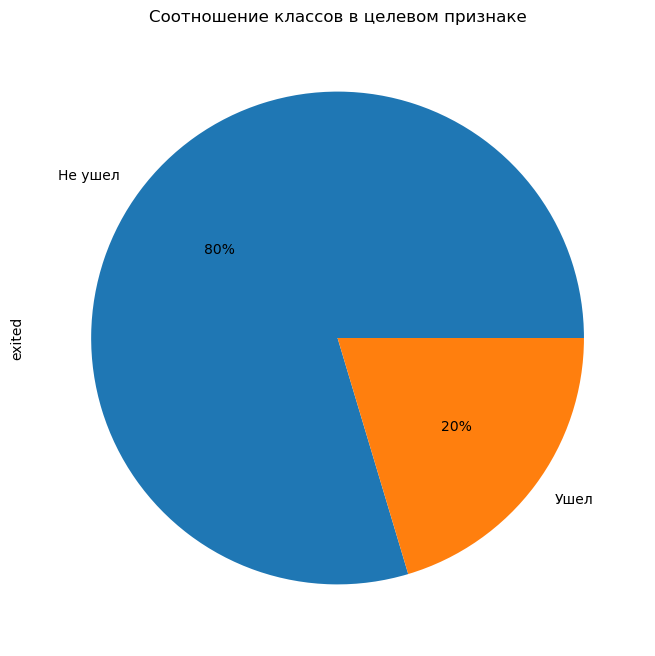

In [16]:
#построим круговую диаграмму
balance = target.value_counts(normalize=True)

balance.plot(kind='pie', autopct="%0.0f%%", figsize=(8, 8), labels = ['Не ушел', 'Ушел'])
plt.title("Соотношение классов в целевом признаке")
plt.show()

виден дисбаланс классов, отрицательных почти в 4 раза больше, чем положительных

In [17]:
#обучим модель логистической регрессии и подсчитаем метрики
model_lr = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')
model_lr.fit(features_train, target_train)
predicted_valid = model_lr.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))
#посчитаем ROC_auc
probabilities_valid = model_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("ROC_auc:", roc_auc_score(target_valid, probabilities_one_valid))

F1: 0.3076923076923077
ROC_auc: 0.7875052345058627


In [18]:
#подберем гиперпараметры для модели случайного леса
best_est = 0
best_f1_score_forest = 0
best_depth = 0
for depth in range(1,16):
    for est in range(3,58):
        model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        f1_scores = f1_score(target_valid, predicted_valid)
        if f1_scores > best_f1_score_forest:
            best_est = est
            best_f1_score_forest = f1_scores
            best_depth = depth
print("Количество деревьев =", best_est, "Глубина дерева" ,best_depth, "F1:", best_f1_score_forest)

Количество деревьев = 43 Глубина дерева 15 F1: 0.6255506607929516


In [19]:
#обучим модель случайного леса с лучшими гиперпараметрами
model_rfc = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=43, max_depth=15)
model_rfc.fit(features_train, target_train)
predicted_valid = model_rfc.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))
probabilities_valid = model_rfc.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("ROC_auc:", roc_auc_score(target_valid, probabilities_one_valid))  

F1: 0.6255506607929516
ROC_auc: 0.8649143388511185


**Вывод:**
- Обучили модель логистической регресии, получили F1 = 0.31 и AUC-ROC = 0.79 
- Обучили модель случайного леса, получили F1 = 0.63 и AUC-ROC = 0.86

Лучший результат без борьбы с дисбалансом классов показала модель случайного леса

## Борьба с дисбалансом

In [20]:
#посмотрим количество объектов отрицательного класса
features_zeros = features[target == 0]
features_zeros.shape

(7963, 11)

In [21]:
#посмотрим количество объектов положительного класса
features_ones = features[target == 1]
features_ones.shape

(2037, 11)

объектов отрицательного класса больше почти в 4 раза, чем положительных

In [22]:
#обучим модель логистической регрессии с учетом баланса классов
model_lr_b = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', class_weight='balanced')
model_lr_b.fit(features_train, target_train)
predicted_valid = model_lr_b.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))
#посчитаем ROC_auc
probabilities_valid = model_lr_b.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("ROC_auc:", roc_auc_score(target_valid, probabilities_one_valid)) 

F1: 0.5289982425307558
ROC_auc: 0.7937004261503596


In [23]:
#расчитаем оптимальный порог классификации для логистической регрессии с учетом баланса классов
probabilities_valid = model_lr_b.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.7, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}, ROC_auc = {:.3f}".format(
        threshold, precision, recall, f1_score(target_valid, predicted_valid), roc_auc_score(target_valid, predicted_valid)))

Порог = 0.00 | Точность = 0.204, Полнота = 1.000, F1 = 0.339, ROC_auc = 0.500
Порог = 0.02 | Точность = 0.204, Полнота = 1.000, F1 = 0.339, ROC_auc = 0.500
Порог = 0.04 | Точность = 0.204, Полнота = 1.000, F1 = 0.339, ROC_auc = 0.500
Порог = 0.06 | Точность = 0.204, Полнота = 1.000, F1 = 0.339, ROC_auc = 0.501
Порог = 0.08 | Точность = 0.206, Полнота = 1.000, F1 = 0.341, ROC_auc = 0.505
Порог = 0.10 | Точность = 0.208, Полнота = 0.998, F1 = 0.344, ROC_auc = 0.511
Порог = 0.12 | Точность = 0.211, Полнота = 0.998, F1 = 0.348, ROC_auc = 0.521
Порог = 0.14 | Точность = 0.216, Полнота = 0.995, F1 = 0.355, ROC_auc = 0.535
Порог = 0.16 | Точность = 0.222, Полнота = 0.995, F1 = 0.362, ROC_auc = 0.550
Порог = 0.18 | Точность = 0.228, Полнота = 0.985, F1 = 0.370, ROC_auc = 0.565
Порог = 0.20 | Точность = 0.234, Полнота = 0.975, F1 = 0.378, ROC_auc = 0.579
Порог = 0.22 | Точность = 0.241, Полнота = 0.966, F1 = 0.386, ROC_auc = 0.594
Порог = 0.24 | Точность = 0.251, Полнота = 0.958, F1 = 0.397, RO

In [24]:
#подберем гиперпараметры для модели случайного леса с учетом баланса классов
best_est2 = 0
best_f1_score_forest2 = 0
best_depth2 = 0
for depth in range(1,16):
    for est in range(3,58):
        model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est, max_depth=depth, class_weight='balanced')
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        f1_scores = f1_score(target_valid, predicted_valid)
        if f1_scores > best_f1_score_forest2:
            best_est2 = est
            best_f1_score_forest2 = f1_scores
            best_depth2 = depth
print("Количество деревьев =", best_est2, "Глубина дерева" ,best_depth2, "F1:", best_f1_score_forest2)

Количество деревьев = 53 Глубина дерева 10 F1: 0.65625


In [25]:
#обучим модель случайного леса с лучшими гиперпараметрами с учетом баланса классов
model_rfc_b = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=29, max_depth=10, class_weight='balanced')
model_rfc_b.fit(features_train, target_train)
predicted_valid = model_rfc_b.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))
probabilities_valid = model_rfc_b.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("ROC_auc:", roc_auc_score(target_valid, probabilities_one_valid))  

F1: 0.6493506493506493
ROC_auc: 0.8688032687949552


In [26]:
#рассчитаем оптимальный порог классификации для случайного леса с учетом баланса классов
probabilities_valid = model_rfc_b.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.7, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}, ROC_auc = {:.3f}".format(
        threshold, precision, recall, f1_score(target_valid, predicted_valid), roc_auc_score(target_valid, predicted_valid)))

Порог = 0.00 | Точность = 0.204, Полнота = 1.000, F1 = 0.339, ROC_auc = 0.500
Порог = 0.02 | Точность = 0.205, Полнота = 1.000, F1 = 0.340, ROC_auc = 0.502
Порог = 0.04 | Точность = 0.211, Полнота = 1.000, F1 = 0.348, ROC_auc = 0.520
Порог = 0.06 | Точность = 0.221, Полнота = 0.995, F1 = 0.362, ROC_auc = 0.548
Порог = 0.08 | Точность = 0.233, Полнота = 0.985, F1 = 0.377, ROC_auc = 0.577
Порог = 0.10 | Точность = 0.246, Полнота = 0.978, F1 = 0.393, ROC_auc = 0.605
Порог = 0.12 | Точность = 0.258, Полнота = 0.971, F1 = 0.408, ROC_auc = 0.628
Порог = 0.14 | Точность = 0.274, Полнота = 0.958, F1 = 0.426, ROC_auc = 0.653
Порог = 0.16 | Точность = 0.288, Полнота = 0.946, F1 = 0.442, ROC_auc = 0.674
Порог = 0.18 | Точность = 0.307, Полнота = 0.936, F1 = 0.462, ROC_auc = 0.697
Порог = 0.20 | Точность = 0.325, Полнота = 0.924, F1 = 0.481, ROC_auc = 0.716
Порог = 0.22 | Точность = 0.344, Полнота = 0.904, F1 = 0.499, ROC_auc = 0.731
Порог = 0.24 | Точность = 0.366, Полнота = 0.897, F1 = 0.520, RO

**Вывод:**
- Обучили модель логистической регресии с учетом баланса классов, получили F1 = 0.53 и AUC-ROC = 0.79
- Обучили модель случайного леса с учетом баланса классов, получили F1 = 0.65 и AUC-ROC = 0.87
- При изменении порога классификации в логистической регрессии оптимальные значений метрик составляют F1 = 0.531, ROC_auc = 0.728 при пороге =0.54
- При изменении порога классификации случайного леса оптимальные значений метрик составляют F1 = 0.655, ROC_auc = 0.788 при пороге =0.50

Значение метрик с учетом баланса классов получились выше, чем значения метрик без борьбы с дизбалансом классов. 
Лучший результат с учетом баланса классов показала модель случайного леса

In [27]:
#увеличим выборку для борьбы с дисбалансом
#напишем функцию upsample
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=RANDOM_STATE)
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [28]:
#обучим модель логистической регрессии на увеличенной выборке
model_lr_upsampled = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')
model_lr_upsampled.fit(features_upsampled, target_upsampled)
predicted_valid = model_lr_upsampled.predict(features_valid) 
print("F1:", f1_score(target_valid, predicted_valid))
#посчитаем ROC_auc
probabilities_valid = model_lr_upsampled.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("ROC_auc:", roc_auc_score(target_valid, probabilities_one_valid)) 

F1: 0.5246753246753246
ROC_auc: 0.7937774041777517


In [29]:
#подберем гиперпараметры для модели случайного леса на увеличенной выборке
best_est3 = 0
best_f1_score_forest3 = 0
best_depth3 = 0
for depth in range(1,16):
    for est in range(3,58):
        model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid)
        f1_scores = f1_score(target_valid, predicted_valid)       
        if f1_scores > best_f1_score_forest3: 
            best_est3 = est
            best_f1_score_forest3 = f1_scores
            best_depth3 = depth
print("Количество деревьев =", best_est3, "Глубина дерева" ,best_depth3, "F1:", best_f1_score_forest3)

Количество деревьев = 37 Глубина дерева 10 F1: 0.6530612244897959


In [30]:
#обучим модель случайного леса с лучшими гиперпараметрами на увеличенной выборке
model_rfc_upsampled = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=37, max_depth=10)
model_rfc_upsampled.fit(features_upsampled, target_upsampled)
predicted_valid = model_rfc_upsampled.predict(features_valid) 
print("F1:", f1_score(target_valid, predicted_valid))
probabilities_valid = model_rfc_upsampled.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("ROC_auc:", roc_auc_score(target_valid, probabilities_one_valid))  

F1: 0.6530612244897959
ROC_auc: 0.8660874839885704


**Вывод:**
- Обучили модель логистической регресии с увеличением выборки, получили F1 = 0.52 и AUC-ROC = 0.79, результат получился чуть ниже, чем при балансе классов гиперпараметром class_weight='balanced'
- Обучили модель случайного леса с учетом баланса классов, получили F1 = 0.65 и AUC-ROC = 0.87, такой же результат, как и припри балансе классов гиперпараметром class_weight='balanced'

In [31]:
#уменьшим выборку для борьбы с дисбалансом
#напишем функцию downsample
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=RANDOM_STATE)
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [32]:
#обучим модель логистической регрессии на уменьшенной выборке
model_lr_downsampled = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')
model_lr_downsampled.fit(features_downsampled, target_downsampled)
predicted_valid = model_lr_downsampled.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))
#посчитаем ROC_auc
probabilities_valid = model_lr_downsampled.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("ROC_auc:", roc_auc_score(target_valid, probabilities_one_valid)) 

F1: 0.5275862068965517
ROC_auc: 0.7926027194797518


In [33]:
#подберем гиперпаматеры для модели случайного леса на уменьшенной выборке
best_est4 = 0
best_f1_score_forest4 = 0
best_depth4 = 0
for depth in range(1,16):
    for est in range(3,58):
        model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est, max_depth=depth)
        model.fit(features_downsampled, target_downsampled)
        predicted_valid = model.predict(features_valid)
        f1_scores = f1_score(target_valid, predicted_valid)
        if f1_scores > best_f1_score_forest4:
            best_est4 = est
            best_f1_score_forest4 = f1_scores
            best_depth4 = depth
print("Количество деревьев =", best_est4, "Глубина дерева" ,best_depth4, "F1:", best_f1_score_forest4)

Количество деревьев = 24 Глубина дерева 7 F1: 0.6396135265700483


In [34]:
#обучим модель случайного леса с лучшими гиперпараметрами на уменьшенной выборке
model_rfc_downsampled = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=24, max_depth=7)
model_rfc_downsampled.fit(features_downsampled, target_downsampled)
predicted_valid = model_rfc_downsampled.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))
probabilities_valid = model_rfc_downsampled.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("ROC_auc:", roc_auc_score(target_valid, probabilities_one_valid)) 

F1: 0.6396135265700483
ROC_auc: 0.8656148389003844


**Вывод:**
- Обучили модель логистической регресии с уменьшенной выборке, получили F1 = 0.53 и AUC-ROC = 0.79, результа получился чуть ниже, чем при балансе классов гиперпараметром `class_weight='balanced'`
- Обучили модель случайного леса с уменьшенной выборке, получили F1 = 0.64 и AUC-ROC = 0.87, результат чуть ниже, чем при балансе классов гиперпараметром `class_weight='balanced'`

## Тестирование модели

In [35]:
#объедними признаки и целевые признаки тренировочной и валидационной выборки
features_general = pd.concat([features_valid, features_train], ignore_index= True)
target_general = pd.concat([target_valid, target_train], ignore_index= True)

In [36]:
#обучим модель случайного леса
model_rfc_test = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=70, max_depth=10, class_weight='balanced')
model_rfc_test.fit(features_general, target_general)
predicted_test = model_rfc_test.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))
#посчитаем ROC_auc
probabilities_test = model_rfc_test.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
print("ROC_auc:", roc_auc_score(target_test, probabilities_one_test))  

F1: 0.6199524940617577
ROC_auc: 0.8538584809771249


Text(0.5, 1.0, 'Важности признаков')

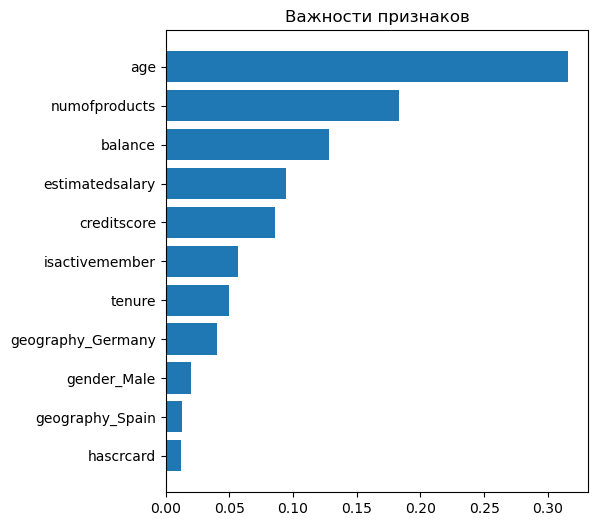

In [37]:
#построим график для понимания важности признаков
feature_importance = model_rfc_b.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(features.columns)[sorted_idx])
plt.title("Важности признаков")

**Вывод:**

 Обучили модель случайного леса на объедененных тренировочной и валидационной выборке при использовании гиперпараметра class_weight='balanced', получили F1 = 0.61 и AUC-ROC = 0.86. Удалось достичь F1 меры не менее 0.59 на тестовой выборке.

# Общий вывод:

1. Загрузили и подготовили данные.
2. Исследовали баланс классов, обучили три модели без учёта дисбаланса.
3. Улучшили качество модели, учитывая дисбаланс классов и выбрали лучшую модель.
4. Провели финальное тестирование. Установлено, что случайный лес при `class_weight='balanced'` имеет хорошую адекватность при AUC-ROC = 0.86, а также при f1-мере = 0.61, то есть предсказания неслучайны.

Больше всего на уход из банка влияют возраст и количество продуктов банка.